In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import dice_ml
from dice_ml.utils import helpers # helper functions
from dice_ml import Data,Model,Dice
import numpy as np
from xgboost import XGBClassifier


c:\Users\praskulkarni\AppData\Local\miniconda3\Lib\site-packages\dice_ml\utils\exception.py:12: UserWarning: UserConfigValidationException will be deprecated from dice_ml.utils. Please import UserConfigValidationException from raiutils.exceptions.
  warnings.warn("UserConfigValidationException will be deprecated from dice_ml.utils. "


In [3]:
dataframe_heart_disease = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

#dataframe_heart_disease =  dataframe_heart_disease.dropna()
dataframe_heart_disease = dataframe_heart_disease[dataframe_heart_disease['chol'] !=0]
dataframe_heart_disease = dataframe_heart_disease[dataframe_heart_disease['trestbps'] !=0]

In [4]:
# Split the data into features and target label
y = dataframe_heart_disease.target
X = dataframe_heart_disease.drop(['target'], axis=1)

In [5]:
dataframe_heart_disease['fbs'][dataframe_heart_disease['fbs'] == 0] = 'Low'
dataframe_heart_disease['fbs'][dataframe_heart_disease['fbs'] == 1] = 'High'

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_69176\1006355660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_heart_disease['fbs'][dataframe_heart_disease['fbs'] == 0] = 'Low'


In [6]:
dataframe_heart_disease['target'][dataframe_heart_disease['target'] == 0] = 'Low Risk'
dataframe_heart_disease['target'][dataframe_heart_disease['target'] == 1] = 'High Risk'

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_69176\1375063302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_heart_disease['target'][dataframe_heart_disease['target'] == 0] = 'Low Risk'


In [7]:
dataframe_heart_disease['sex'][dataframe_heart_disease['sex'] == 0] = 'female'
dataframe_heart_disease['sex'][dataframe_heart_disease['sex'] == 1] = 'male'

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_69176\582525656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_heart_disease['sex'][dataframe_heart_disease['sex'] == 0] = 'female'


In [8]:
dataframe_heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,male,2,140,289,Low,0,172,0,0.0,1,Low Risk
1,49,female,3,160,180,Low,0,156,0,1.0,2,High Risk
2,37,male,2,130,283,Low,1,98,0,0.0,1,Low Risk
3,48,female,4,138,214,Low,0,108,1,1.5,2,High Risk
4,54,male,3,150,195,Low,0,122,0,0.0,1,Low Risk


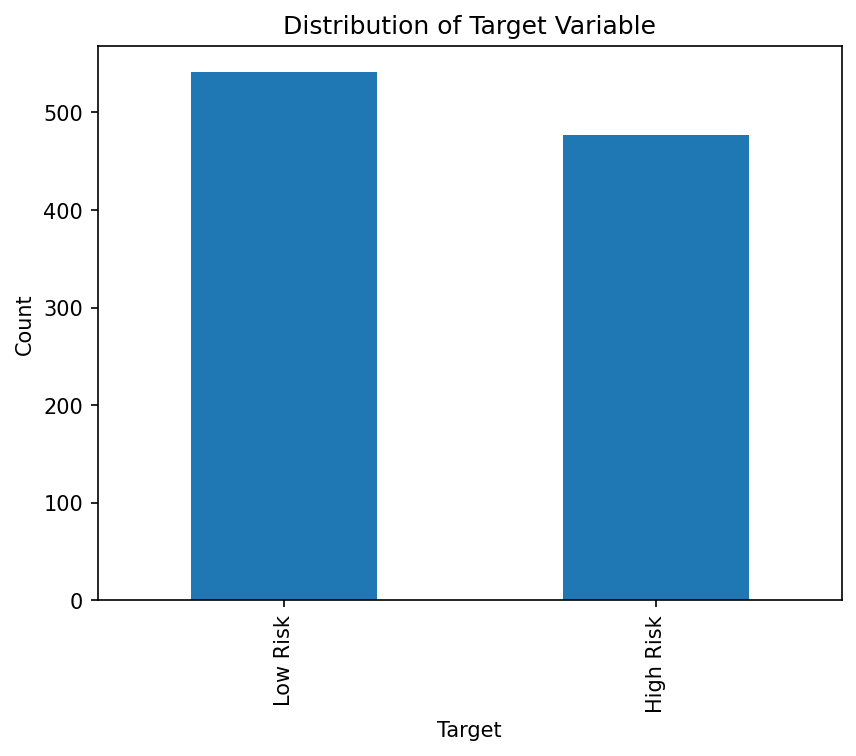

In [9]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'target' is your target column
dataframe_heart_disease['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

C:\Users\praskulkarni\AppData\Local\Temp\ipykernel_69176\4173252505.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_heart_disease['trestbps'], bins=30, color='skyblue', kde=False)


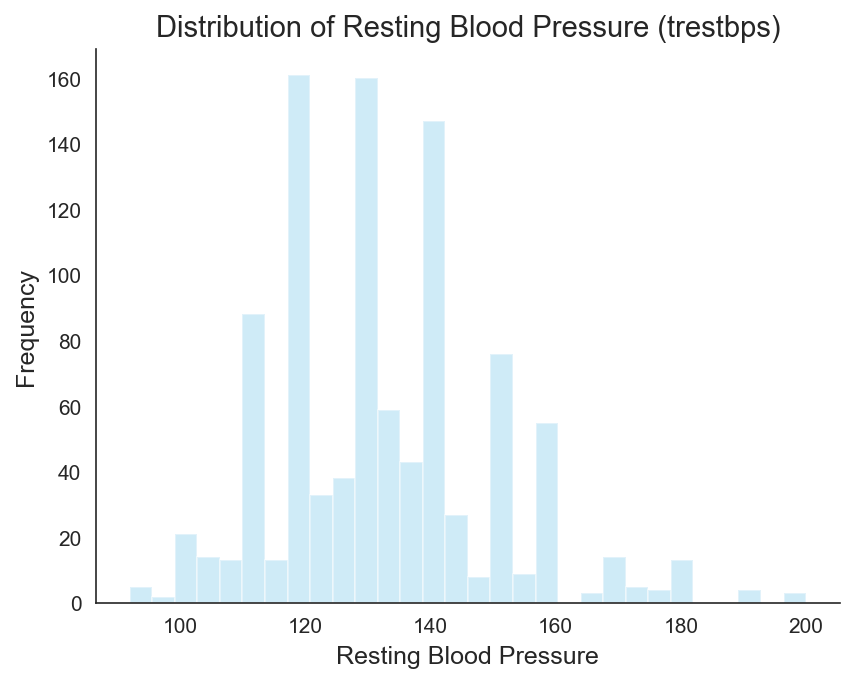

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to white
sns.set_style("white")

# Create the histogram
sns.distplot(dataframe_heart_disease['trestbps'], bins=30, color='skyblue', kde=False)

# Remove the top and right spines from plot
sns.despine()

# Add title and labels
plt.title('Distribution of Resting Blood Pressure (trestbps)', fontsize=14)
plt.xlabel('Resting Blood Pressure', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

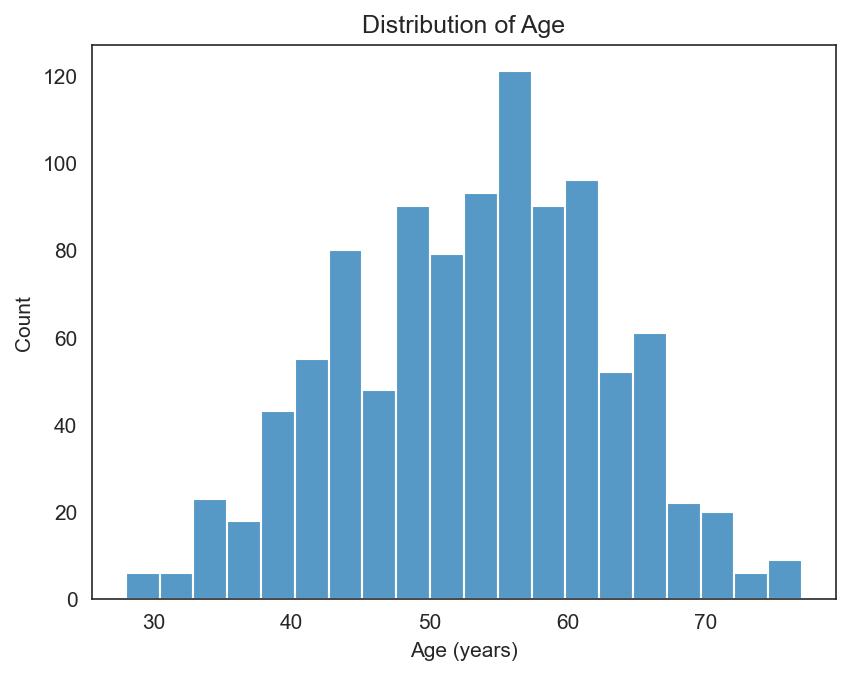

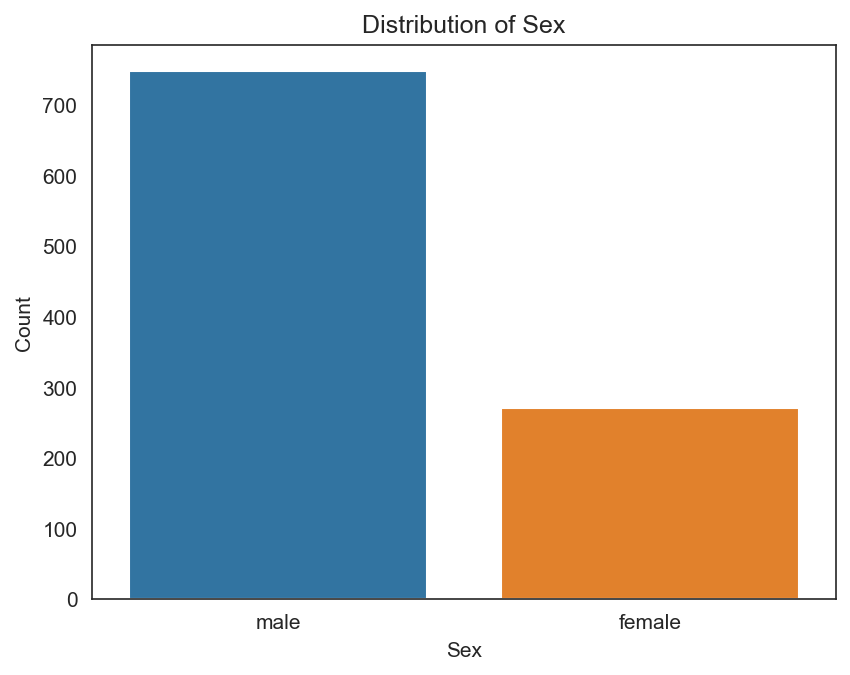

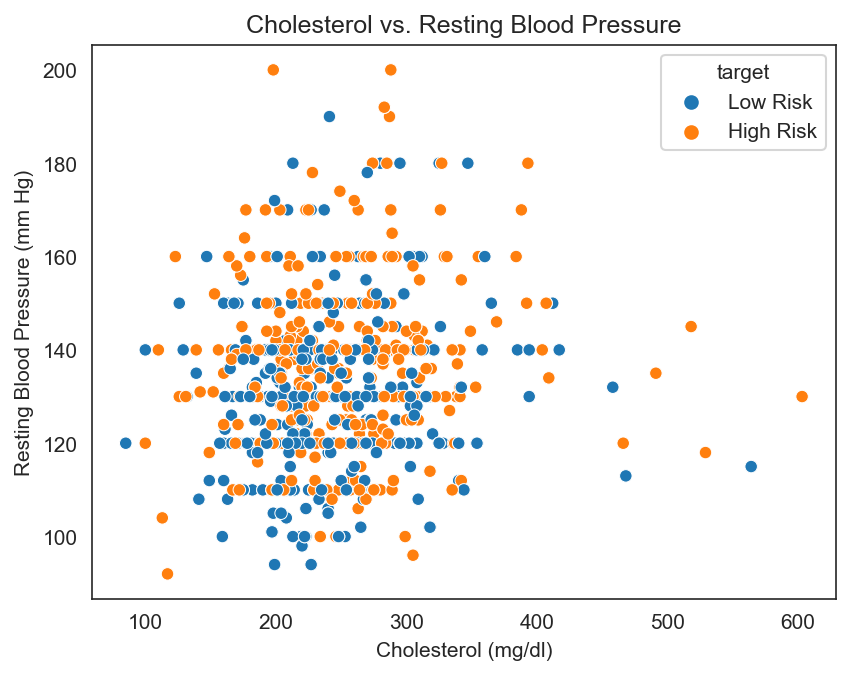

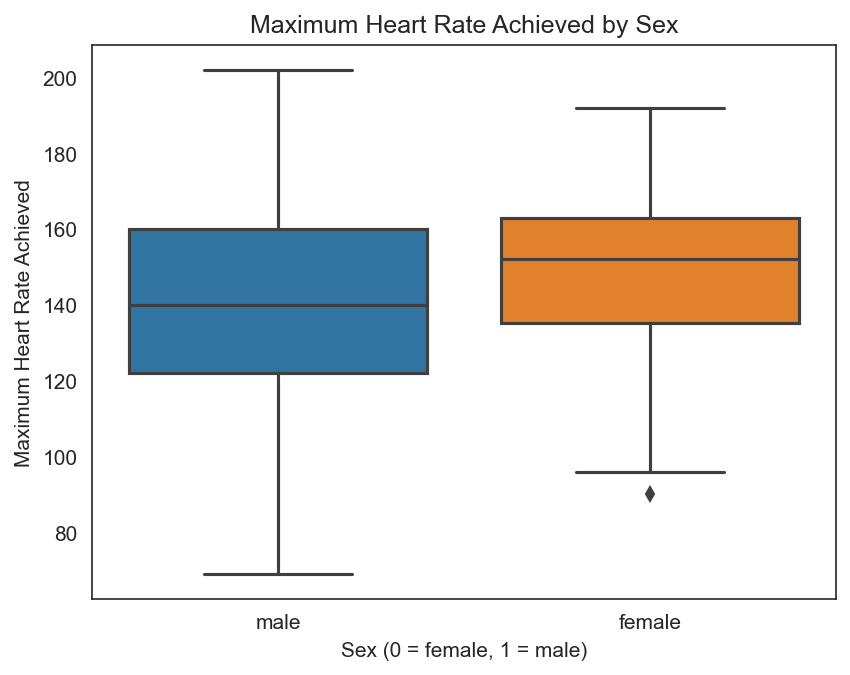

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the 'age' column
sns.histplot(dataframe_heart_disease, x='age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

# Plot a bar chart of the 'sex' column
sns.countplot(dataframe_heart_disease, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot a scatter plot of the 'chol' column vs. the 'trestbps' column
sns.scatterplot(dataframe_heart_disease, x='chol', y='trestbps', hue='target')
plt.title('Cholesterol vs. Resting Blood Pressure')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

# Plot a box plot of the 'thalach' column grouped by the 'sex' column
sns.boxplot(dataframe_heart_disease, x='sex', y='thalach')
plt.title('Maximum Heart Rate Achieved by Sex')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()



In [12]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical = dataframe_heart_disease.columns.difference(numerical)

In [13]:
categorical = categorical.drop(['target'])

In [14]:
cat_cols = categorical.tolist()

In [15]:
cat_cols

['cp', 'exang', 'fbs', 'restecg', 'sex', 'slope']

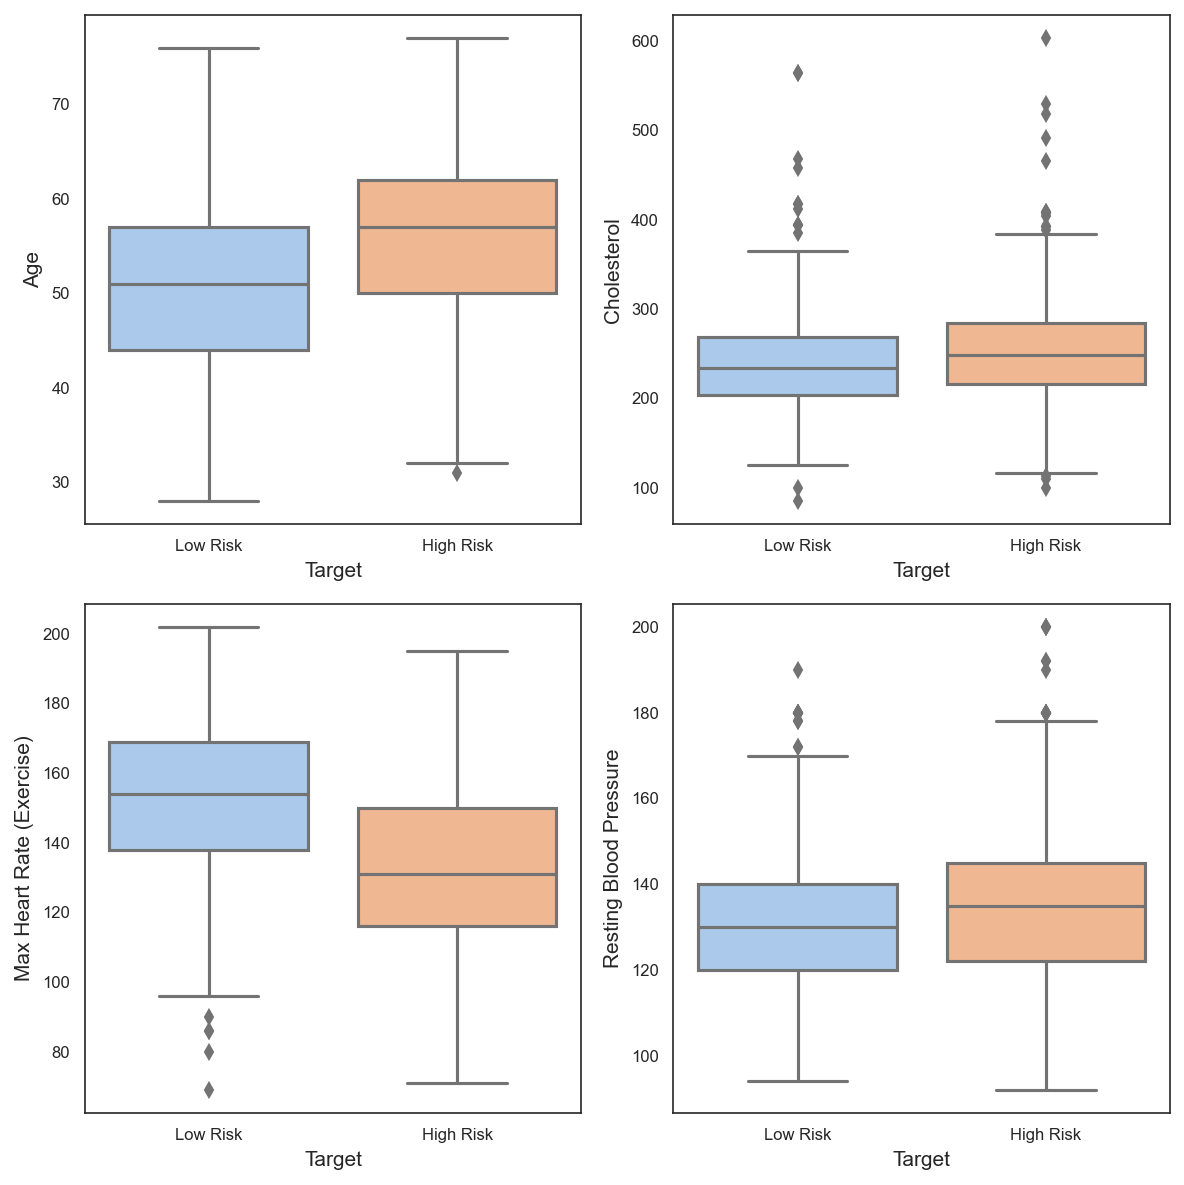

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of column names to plot
cols = [{'age': 'Age'}, {'chol': 'Cholesterol'}, {'thalach': 'Max Heart Rate (Exercise)'}, {'trestbps': 'Resting Blood Pressure'}]

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot each box plot in a separate subplot
for i, col_dict in enumerate(cols):
    col_name = list(col_dict.keys())[0]
    col_label = col_dict[col_name]
    row = i // 2
    col = i % 2
    sns.boxplot(data=dataframe_heart_disease, y=col_name, x='target', ax=axes[row, col], palette='pastel')
    axes[row, col].set_xlabel('Target')
    axes[row, col].set_ylabel(col_label)
    axes[row, col].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

For subjects with cholestestoral in range … and have target=0, their target would be 1 if cholesterol were greater than …
For subjects with cholesterol in range … and thalac in range … and target = 0, their target would be 1 if cholesterol were in range …. thalac were in range …
Monotonicity
Shape of the Curve between variables 
Cholestrol can either increase the chance or it has no effect
(Constrained XgBoost, Normalizing flows,Linear Models)

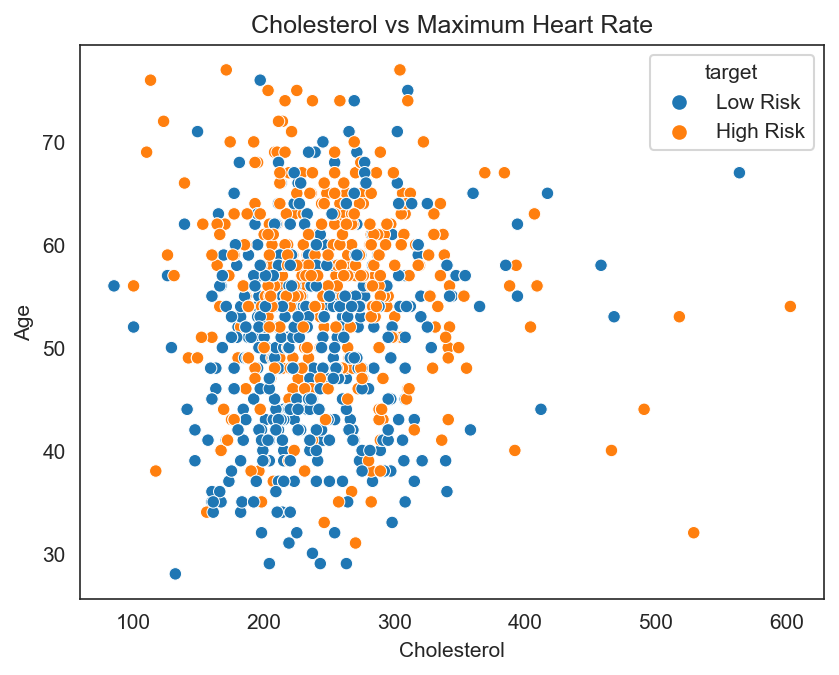

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of chol vs thalach
sns.scatterplot(data=dataframe_heart_disease, x='chol', y='age', hue = 'target')

# Add a title and axis labels to the plot
plt.title('Cholesterol vs Maximum Heart Rate')
plt.xlabel('Cholesterol')
plt.ylabel('Age')

plt.show()

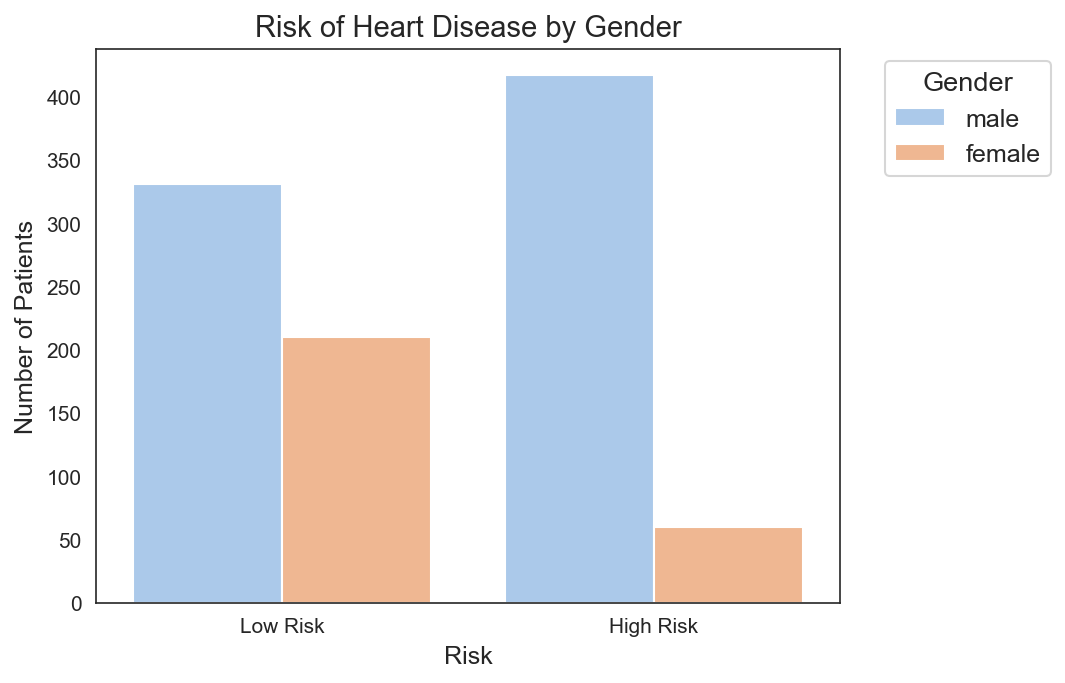

In [18]:
import matplotlib.pyplot as plt

# Set DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Set the color palette
#sns.set_palette('pastel')

# Create a count plot of target vs fbs
sns.countplot(data=dataframe_heart_disease, x='target', hue='sex', palette='pastel')

# Add a title and axis labels to the plot with increased font size
plt.title('Risk of Heart Disease by Gender', fontsize=14)
plt.xlabel('Risk', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add a legend with a title and increased font size
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.3, 1), title_fontsize='13', fontsize='12')

plt.show()

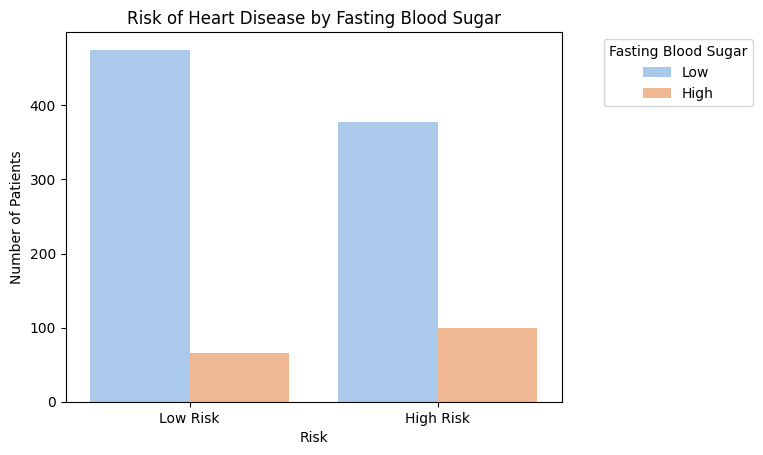

In [44]:
# Set the color palette
sns.set_palette('pastel')

# Create a count plot of target vs fbs
sns.countplot(data=dataframe_heart_disease, x='target', hue='fbs', palette='pastel')

# Add a title and axis labels to the plot
plt.title('Risk of Heart Disease by Fasting Blood Sugar')
plt.xlabel('Risk')
plt.ylabel('Number of Patients')

# Add a legend with a title
plt.legend(title='Fasting Blood Sugar', loc='upper right', bbox_to_anchor=(1.4, 1))

plt.show()

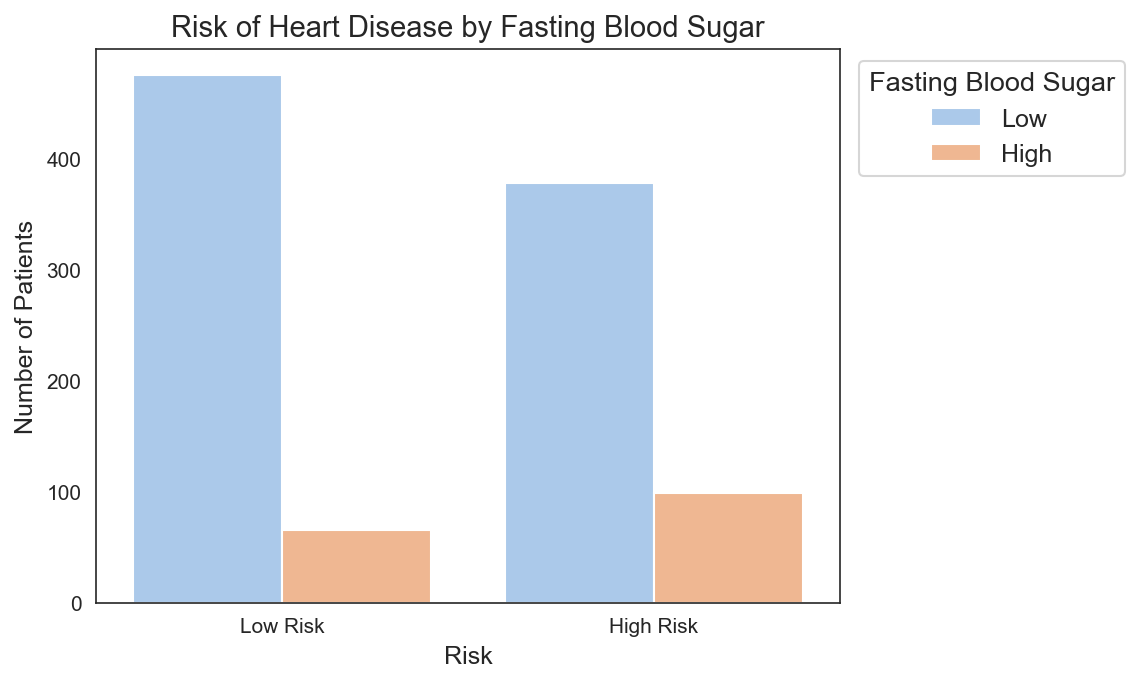

In [19]:
import matplotlib.pyplot as plt

# Set DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Set the color palette
sns.set_palette('pastel')

# Create a count plot of target vs fbs
sns.countplot(data=dataframe_heart_disease, x='target', hue='fbs', palette='pastel')

# Add a title and axis labels to the plot with increased font size
plt.title('Risk of Heart Disease by Fasting Blood Sugar', fontsize=14)
plt.xlabel('Risk', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add a legend with a title and increased font size
plt.legend(title='Fasting Blood Sugar', loc='upper right', bbox_to_anchor=(1.4, 1), title_fontsize='13', fontsize='12')

plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

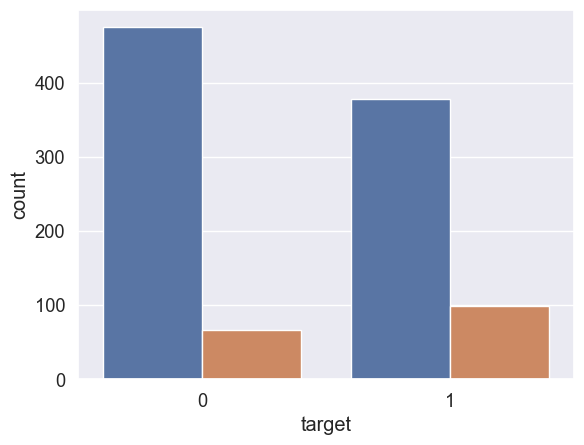

In [23]:
# Create a count plot of target vs fbs
sns.countplot(data=dataframe_heart_disease, x='target', hue='fbs')

# Add a title and axis labels to the plot
plt.title('Target vs Fasting Blood Sugar')
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

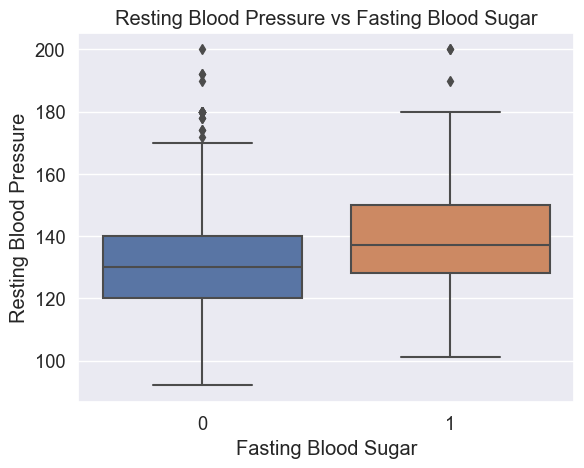

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a box plot of fbs vs restbp
sns.boxplot(data=dataframe_heart_disease, x='fbs', y='trestbps')

# Add a title and axis labels to the plot
plt.title('Resting Blood Pressure vs Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Resting Blood Pressure')

plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns



# Create separate| count plots of target vs fbs for each value of chol
sns.catplot(data=dataframe_heart_disease, x='target', hue='fbs', col='chol', kind='count')

# Add a title and axis labels to the plot
plt.suptitle('Target vs Fasting Blood Sugar by Cholesterol')
plt.subplots_adjust(top=0.85)
plt.xlabel('Target')
plt.ylabel('Count')

plt.show()

ValueError: Image size of 110500x500 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x000002C32D53F6A0> (for post_execute):


ValueError: Image size of 110500x500 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 110500x500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 110500x500 with 221 Axes>

In [ ]:
from scipy.stats import chi2_contingency



# Create a contingency table of target vs fbs
contingency_table = pd.crosstab(dataframe_heart_disease['target'], dataframe_heart_disease['fbs'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 13.038238113931083
p-value: 0.0003051950786079707
Degrees of freedom: 1
Expected frequencies: [[453.31335953  87.68664047]
 [399.68664047  77.31335953]]


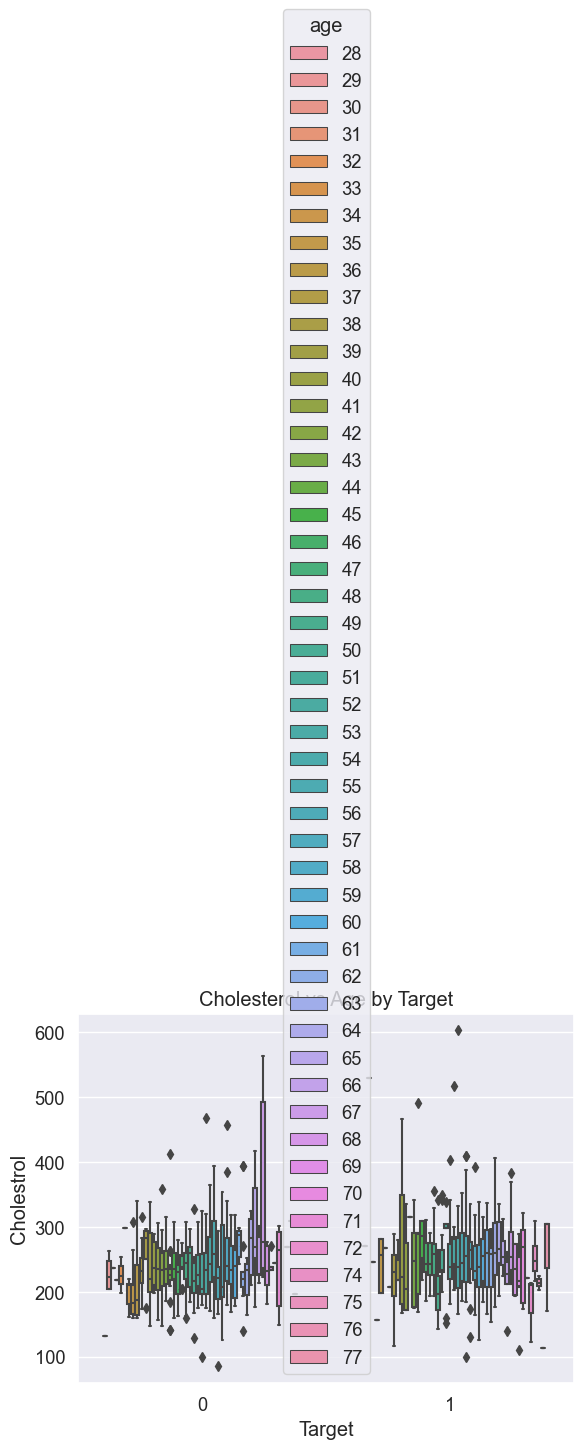

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of chol vs thalach with different colors for each value of target
sns.boxplot(data=dataframe_heart_disease, x='target', y='chol', hue='age')

# Add a title and axis labels to the plot
plt.title('Cholesterol vs Age by Target')
plt.xlabel('Target')
plt.ylabel('Cholestrol')

plt.show()